In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

2024-02-28 07:51:17.835761: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 07:51:17.835857: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 07:51:18.025470: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# Define the path to your dataset
data_path_train = "/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/train"
data_path_val="/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val"
# Specify parameters
img_size = (256,256)
batch_size = 32

# Use ImageDataGenerator for data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

# Create generators for training and validation sets
train_generator = datagen.flow_from_directory(
    data_path_train,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')
validation_generator = datagen.flow_from_directory(
    data_path_val,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.


In [ ]:
pretrained_model = tf.keras.applications.resnet50.ResNet50(
                    input_shape=(256,256,3),
                    include_top=False,
                    weights='imagenet',
                    pooling='avg')

pretrained_model.trainable = False
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(50, activation='relu')(x)
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,validation_data=validation_generator,epochs=10)

Epoch 1/10


I0000 00:00:1709106709.862938     124 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


190/190 [==============================] - 150s 742ms/step - loss: 0.4487 - accuracy: 0.8157 - val_loss: 0.4173 - val_accuracy: 0.8383
Epoch 2/10
190/190 [==============================] - 82s 434ms/step - loss: 0.3128 - accuracy: 0.8690 - val_loss: 0.3234 - val_accuracy: 0.8730
Epoch 3/10
190/190 [==============================] - 83s 438ms/step - loss: 0.2746 - accuracy: 0.8839 - val_loss: 0.2989 - val_accuracy: 0.8710
Epoch 4/10
190/190 [==============================] - 83s 435ms/step - loss: 0.2416 - accuracy: 0.8981 - val_loss: 0.2929 - val_accuracy: 0.8889
Epoch 5/10
190/190 [==============================] - 82s 432ms/step - loss: 0.2264 - accuracy: 0.9078 - val_loss: 0.3297 - val_accuracy: 0.8527
Epoch 6/10
190/190 [==============================] - 83s 439ms/step - loss: 0.2076 - accuracy: 0.9143 - val_loss: 0.3017 - val_accuracy: 0.8795
Epoch 7/10
190/190 [==============================] - 84s 441ms/step - loss: 0.1894 - accuracy: 0.9199 - val_loss: 0.3355 - val_accuracy: 0.

In [ ]:
data_path_test="/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/test"
test_generator = test_datagen.flow_from_directory(
    data_path_test,
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

# Evaluate the model on the test set
results = model.evaluate(validation_generator)

# Print the evaluation results
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

Found 2025 images belonging to 5 classes.
63/63 [==============================] - 21s 335ms/step - loss: 0.2949 - accuracy: 0.8864
Test Loss: 0.29485270380973816
Test Accuracy: 0.8864087462425232


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
print(classification_report(y_true, y_pred))

64/64 [==============================] - 30s 477ms/step
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       403
           1       0.98      0.98      0.98       407
           2       0.95      0.91      0.93       404
           3       0.99      1.00      0.99       408
           4       0.76      0.76      0.76       403

    accuracy                           0.89      2025
   macro avg       0.89      0.89      0.89      2025
weighted avg       0.89      0.89      0.89      2025



64/64 [==============================] - 21s 327ms/step


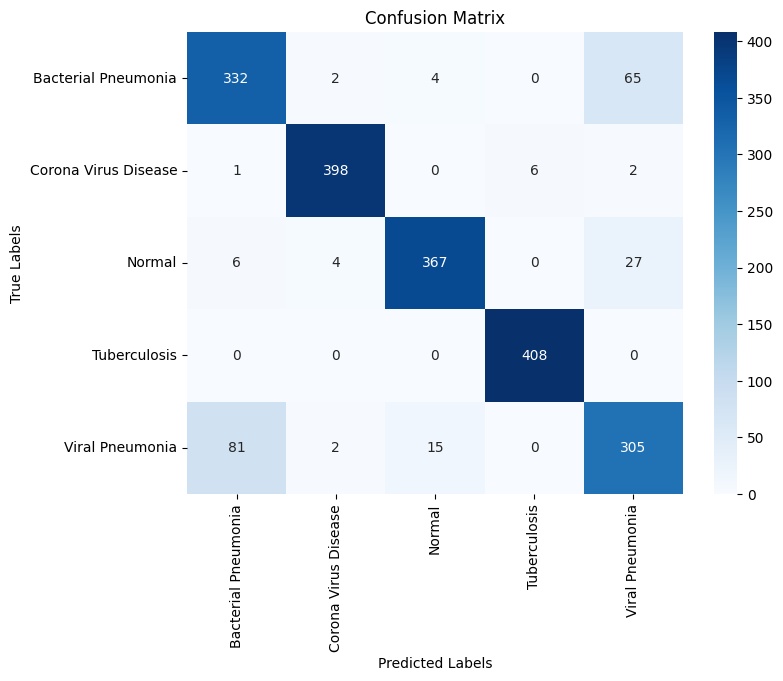

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get the true labels
true_labels = test_generator.classes

# Predict the labels using the model
predictions = model.predict(test_generator)

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

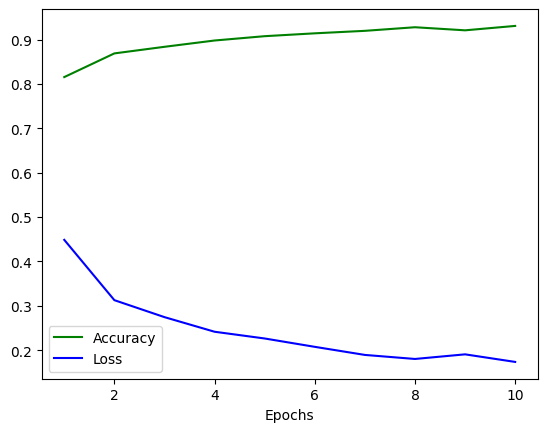

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),history.history['accuracy'],color='g',label='Accuracy')
plt.plot(range(1,11),history.history['loss'],color='blue',label='Loss')
plt.xlabel('Epochs')
plt.legend()

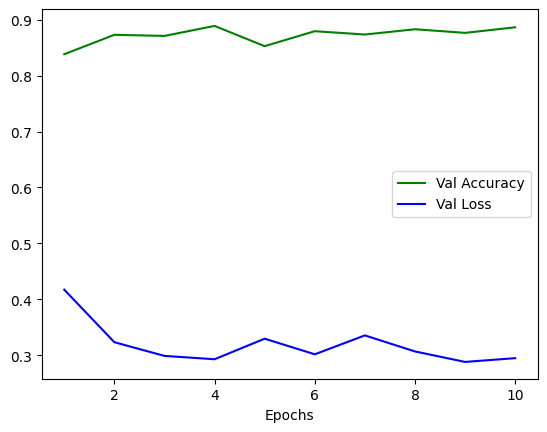

In [ ]:
plt.plot(range(1,11),history.history['val_accuracy'],color='g',label='Val Accuracy')
plt.plot(range(1,11),history.history['val_loss'],color='blue',label='Val Loss')
plt.xlabel('Epochs')
plt.legend()

In [ ]:
model.save("Multiclass_ResNet50.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 2s 2s/step
Original Prediction: Corona Virus Disease


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


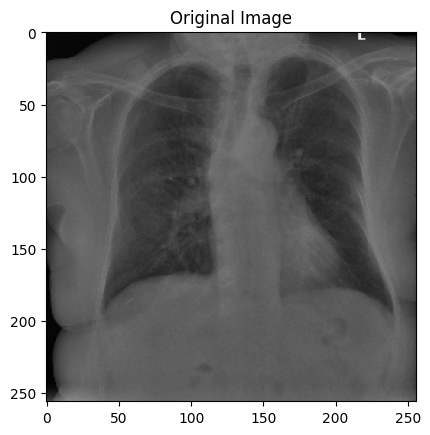

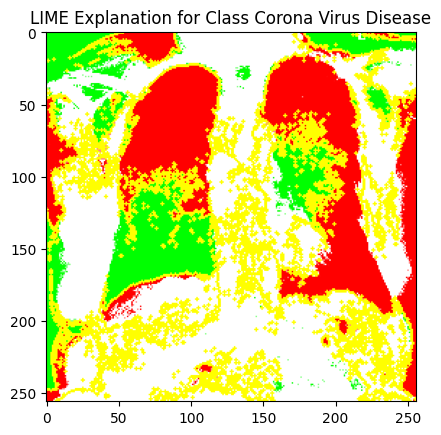

In [ ]:
import lime
from lime import lime_image
from keras.models import load_model
from lime.wrappers.scikit_image import SegmentationAlgorithm
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries

# Load the trained multiclass model
#model = load_model("your_multiclass_model.h5")  # Replace with the actual path to your model

# Define a custom segmentation algorithm
#segmentation_fn = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=200, ratio=0.2)

# Create a LIME explainer with the custom segmentation algorithm
explainer = lime_image.LimeImageExplainer()

# Load and preprocess an image for LIME interpretation
img_for_lime, _ = validation_generator.next()  # Load an example image from the validation set
img_for_lime = img_for_lime[0]  # Take the first image from the batch

# Add a dummy RGB channel to the grayscale image
img_for_lime_rgb = np.stack((img_for_lime[:, :, 0],) * 3, axis=-1)
labels = {value: key for key, value in train_generator.class_indices.items()}
# Get the original prediction
original_prediction = model.predict(np.expand_dims(img_for_lime, axis=0))
print("Original Prediction:", labels[np.argmax(original_prediction)])

# Explain the prediction using LIME for top three classes with custom segmentation
explanation = explainer.explain_instance(
    img_for_lime_rgb,
    model.predict,
    top_labels=1,  # Specify the number of top classes for explanation
    hide_color=0,
    num_samples=1000
)

# Display the original image
plt.imshow(img_for_lime[:, :, 0], cmap='gray')  # Assuming images are grayscale
plt.title('Original Image')
plt.show()

# Display the LIME explanation for the top three predictions
for label in explanation.top_labels:
    temp, mask = explanation.get_image_and_mask(
        label,
        positive_only=False,
        num_features=img_size[0],  # Specify based on your image dimensions
        hide_rest=False
    )
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.title(f'LIME Explanation for Class {labels[label]}')
    plt.show()
